In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True 

credit = pd.read_csv(r'C:\Users\Lenovo\Documents\Kuliah - UAJY\Semester V - 2024-2025\Pembelajaran mesin dan Pembelajaran Mendalam - A\Modul 4\Tugas4_A_12071\credit_card.csv')
credit.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [2]:
print("data null \n", credit.isnull().sum())
print("data kosong \n", credit.empty)
print("data nan \n", credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [3]:
df_credit = credit.drop(['Customer Key', 'Sl_No'], axis=1)
df_credit.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<Axes: >

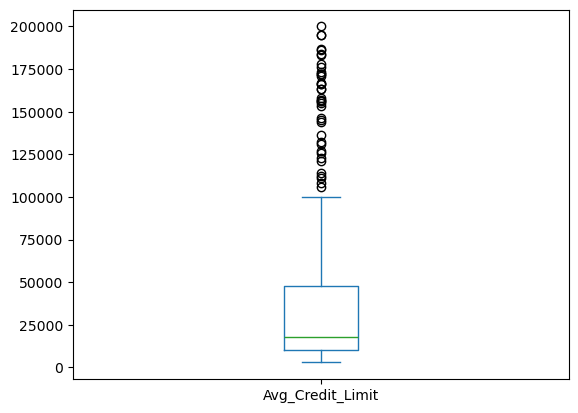

In [4]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah baris DataFrame sebelum dibuang outlier 660
Jumlah baris DataFrame sesudah dibuang outlier 621


<Axes: >

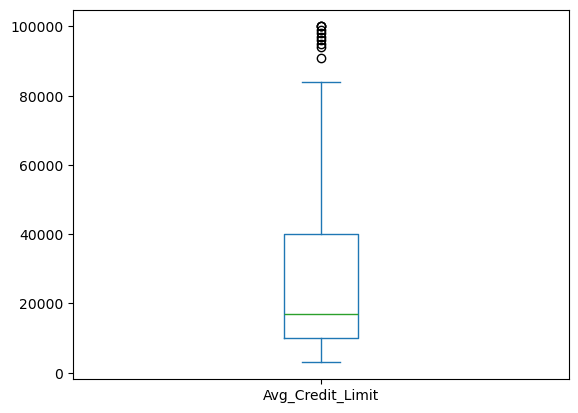

In [5]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df_in, col_name):
    df_out = df_in.copy()
    if is_numeric_dtype(df_out[col_name]):
        q1 = df_out[col_name].quantile(0.25)
        q3 = df_out[col_name].quantile(0.75)
        
        iqr = q3 - q1
        batas_atas = q3 + (1.5 * iqr)
        batas_bawah = q1 - (1.5 * iqr)
        
        df_out = df_out[(df_out[col_name] >= batas_bawah) & (df_out[col_name] <= batas_atas)]
    return df_out

credit_clean = remove_outlier(df_credit, 'Avg_Credit_Limit')
print("Jumlah baris DataFrame sebelum dibuang outlier", df_credit.shape[0])
print("Jumlah baris DataFrame sesudah dibuang outlier", credit_clean.shape[0])
credit_clean['Avg_Credit_Limit'].plot(kind="box")


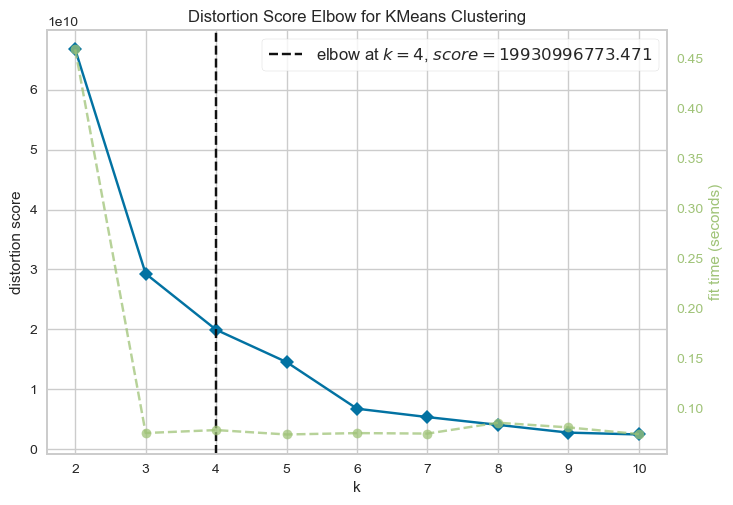

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=71)
vis = KElbowVisualizer(kmeans, k=(2, 11))  

vis.fit(credit_clean)
vis.show() 


Silhouette Score K-Means for  2  cluster 0.7275517813087928
Silhouette Score K-Means for  3  cluster 0.7058100919802311
Silhouette Score K-Means for  4  cluster 0.6772479571163517
Silhouette Score K-Means for  5  cluster 0.5726735020094087
Silhouette Score K-Means for  6  cluster 0.6271336425919736
Silhouette Score K-Means for  7  cluster 0.6052043256722633
Silhouette Score K-Means for  8  cluster 0.5950344026396134
Silhouette Score K-Means for  9  cluster 0.6101535358217619
Silhouette Score K-Means for  10  cluster 0.5931148577985247


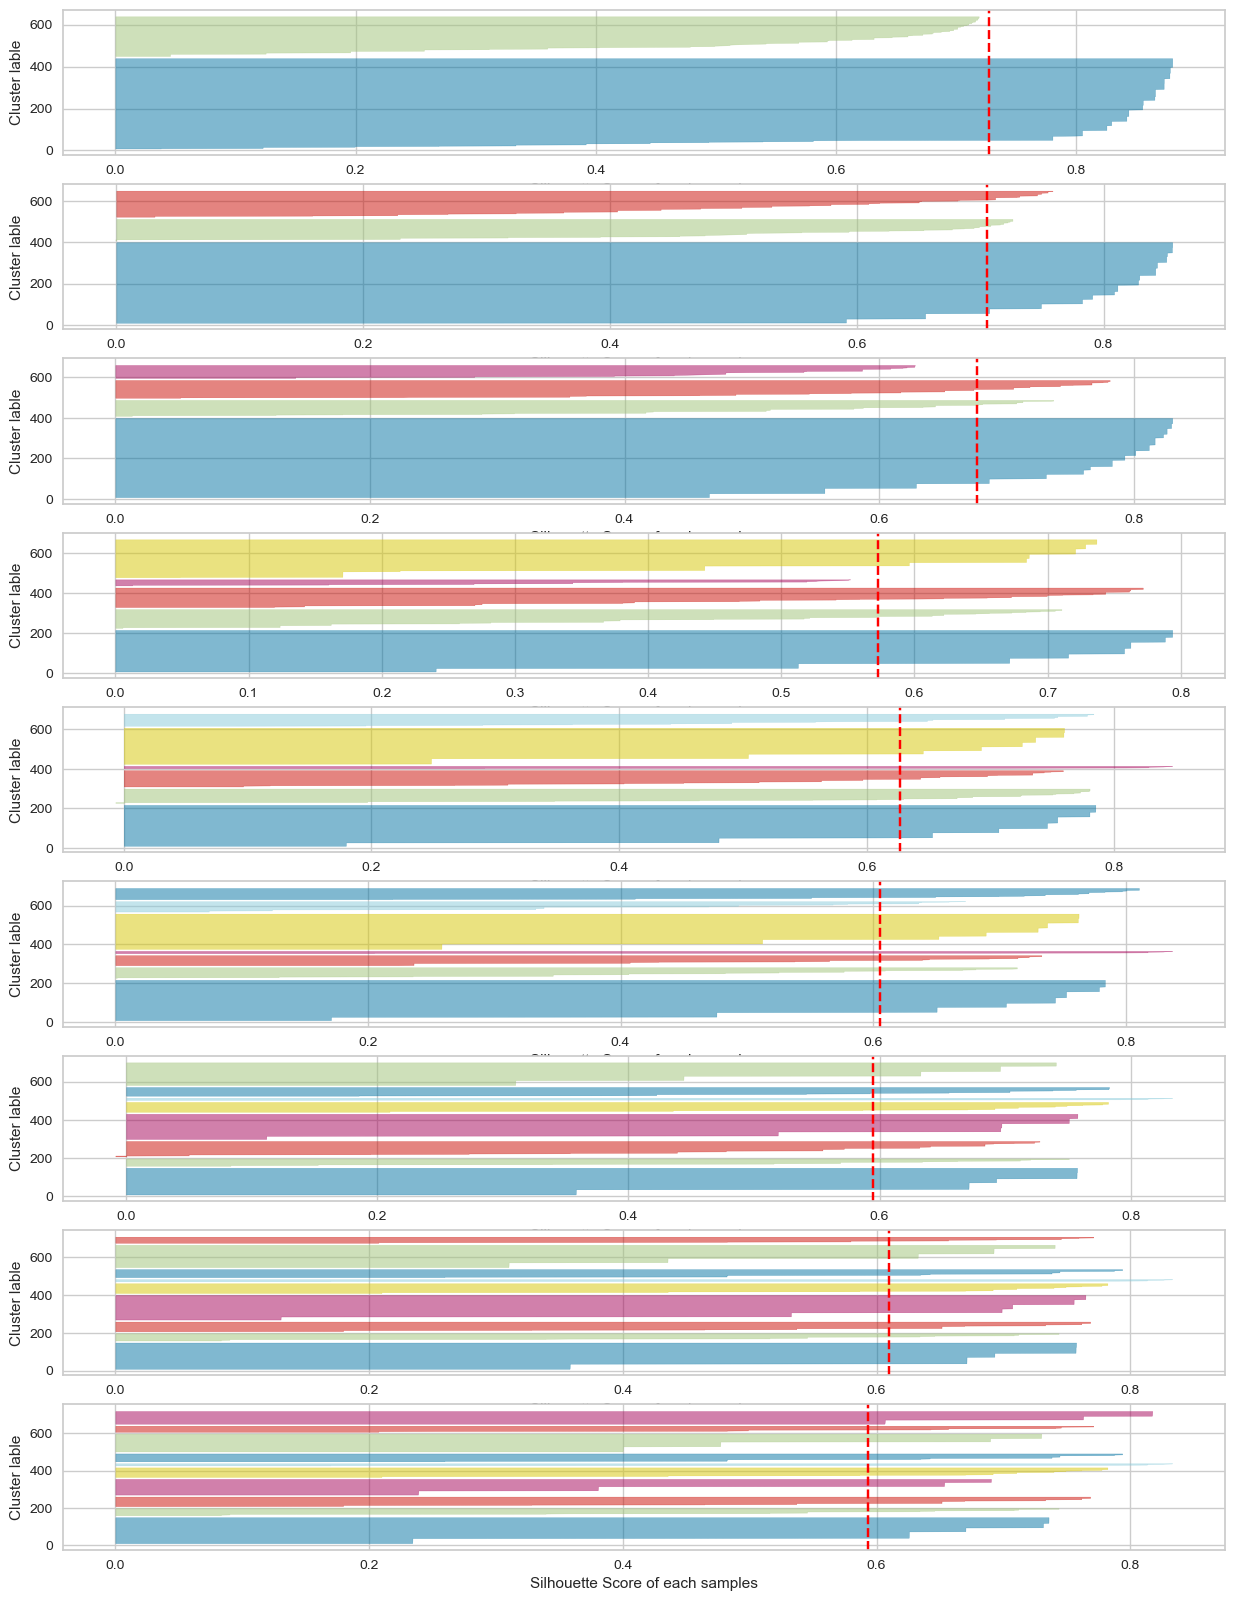

In [7]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9,1, figsize=(15,20))

for k in np.arange(2,11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=71)
    KM_Clusters=kMeansC.fit_predict(credit_clean)
    print("Silhouette Score K-Means for ", k, " cluster", silhouette_score(credit_clean, KM_Clusters))

    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(credit_clean)

    ax[k-2].set(xlabel="Silhouette Score of each samples", ylabel="Cluster lable")

In [8]:
credit_clean.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

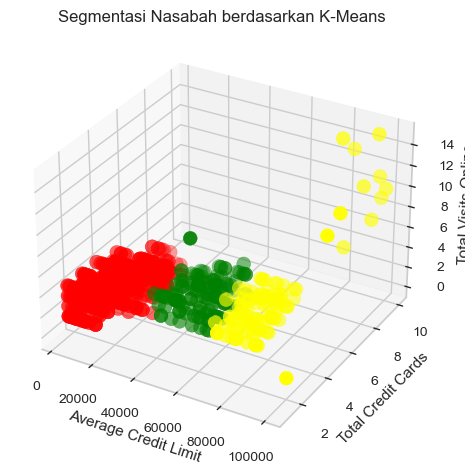

Silhouette Score K-Means 0.706


In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=71)
K_clusters = kmeans.fit_predict(credit_clean)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4: 'magenta', 5: 'black', 6: 'cyan'}

ax.scatter(credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'], credit_clean['Total_visits_online'],
           c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means %0.3f" % silhouette_score(credit_clean, K_clusters))

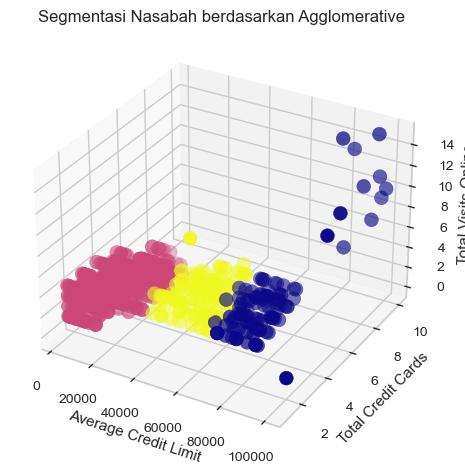

Silhouette Score Agglomerative: 0.705


In [10]:

import seaborn as sns
from matplotlib.colors import ListedColormap  

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(credit_clean)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'], credit_clean['Total_visits_online'],
           c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score Agglomerative: %0.3f" % silhouette_score(credit_clean, AGG_clusters))

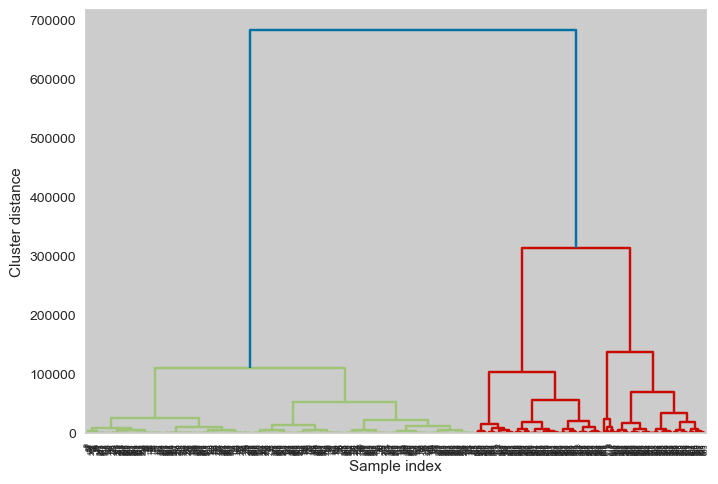

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage


linkage_array = linkage(credit_clean, method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

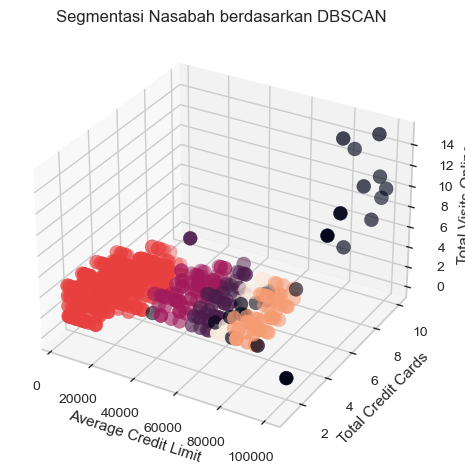

Silhouette Score DBSCAN: 0.657


In [12]:
DBSC = DBSCAN(min_samples=20, eps=2500)

DBSC_clusters = DBSC.fit_predict(credit_clean)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'], credit_clean['Total_visits_online'],
           c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score DBSCAN: %0.3f" % silhouette_score(credit_clean, DBSC_clusters))

In [14]:
import pickle

with open('KMeans_model.pkl', 'wb') as r:
    pickle.dump((kmeans),r)
    
with open('AGG_model.pkl', 'wb') as r:
    pickle.dump((kmeans),r)

with open('DBSCAN_model.pkl', 'wb') as r:
    pickle.dump((kmeans),r)

print("Model berhasil disimpan")

Model berhasil disimpan
